In [ ]:
!pip install kaggle

In [ ]:
# Configuring the path of Kaggle.json File
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataset api
!kaggle competitions download -c cifar-10

100% 713M/715M [00:05<00:00, 119MB/s]
100% 715M/715M [00:05<00:00, 139MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras


from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['48246.png', '14500.png', '32463.png', '32612.png', '185.png']
['10137.png', '9949.png', '43724.png', '28017.png', '26029.png']


In [ ]:
df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
df.shape

(50000, 2)

In [ ]:
df[df['id']== 7796]

,id,label
7795,7796,frog


In [ ]:
df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
label_dictionary = {'frog':0,'truck':1,'deer':2,'automobile':3,'bird':4,'horse':5,'ship':6,'cat':7,'dog':8,'airplane':9}

labels = [label_dictionary[i] for i in df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[0, 1, 1, 2, 3]
[4, 0, 1, 3, 3]


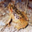

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [ ]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [ ]:
# convert images to numpy array

train_data_folder = '/content/train/'

data = []

for id in id_list :
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
# convert images list and labels list in numpy array

X = np.array(data)
y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X.shape

(50000, 32, 32, 3)

In [ ]:
y.shape

(50000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

**BUILDING THE NEURAL NETWORK**

Tensorflow is developed by google & PyTorch is developed by Facebook

In [ ]:
num_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

In [ ]:
# compile the neural network

model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, validation_split= 0.2, epochs = 10)

Epoch 1/10
1000/1000 [==============================] - 10s 9ms/step - loss: 2.0386 - accuracy: 0.2219 - val_loss: 1.9532 - val_accuracy: 0.2625
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 1.9499 - accuracy: 0.2651 - val_loss: 1.9473 - val_accuracy: 0.2727
Epoch 3/10
1000/1000 [==============================] - 11s 11ms/step - loss: 1.9264 - accuracy: 0.2838 - val_loss: 1.9013 - val_accuracy: 0.2912
Epoch 4/10
1000/1000 [==============================] - 13s 13ms/step - loss: 1.9071 - accuracy: 0.2944 - val_loss: 1.8887 - val_accuracy: 0.2964
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.8927 - accuracy: 0.3043 - val_loss: 1.8753 - val_accuracy: 0.3064
Epoch 6/10
1000/1000 [==============================] - 12s 12ms/step - loss: 1.8800 - accuracy: 0.3047 - val_loss: 1.8505 - val_accuracy: 0.3126
Epoch 7/10
1000/1000 [==============================] - 11s 11ms/step - loss: 1.8705 - accuracy: 0.3097 - val_loss: 1.8838 - va

 **ResNet50**

In [ ]:
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256,256,3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(convolutional_base)

model.add(layers.Flatten())

model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())

model.add(layers.Dense(num_of_classes, activation = 'relu'))

In [ ]:
model.summary()

ValueError: ignored